In [1]:
# importing all the essential libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import random
from sklearn.decomposition import PCA

In [2]:
# reading the final dataset
data=pd.read_csv('dataset/merged.csv',low_memory=False)

In [3]:
# columns that are needed to be converted


column_type=['Pressure_dbar',
             'Temperature_Celcius',
             'salinity_pss',
             'Sigma_theta_kg_m_pow_minus_3',
             'depth_m',
             'oxygen_mu_molkg_pow_minus_1',
             'oxygen_saturation_percentage',
             'nitrate_mu_mol_kg_pow_minus_1',
             'chl_a_mg_m_pow_minus_3',
             'b_bp700_m_pow_minus_1',
             'POC_milli_mol_m_pow_minus_3',
             'pH_insitu_total','pH_25C_total',
             'TALK_micro_mol_kg_pow_minus_1',
             'DIC_micro_mol_kg_pow_minus_1',
             'pCO2_micro_atm','b_bp532_m_pow_minus_1',
             'CDOM_ppb']

In [4]:
# action for column conversion from object to float

for col in column_type:
    data[col]=data[col].astype(float)

In [5]:
# droppoing mbariID column as it contains only 1 value

data.drop(['mbariID'],axis=1,inplace=True)

In [6]:
data.drop(['Type',
           'pressure_QF',
           'temperature_QF',
           'b_bp532_m_pow_minus_1',
           'b_bp532_QF',
          'oxygen_saturation_percentage'],axis=1,inplace=True)

In [7]:
# columns which are having invalid values mixed with valid values

col_list= ["chl_a_mg_m_pow_minus_3" ,
    "b_bp700_m_pow_minus_1" , 
    "POC_milli_mol_m_pow_minus_3" , 
    "pH_insitu_total" , "pH_25C_total" , 
    "TALK_micro_mol_kg_pow_minus_1" , 
    "DIC_micro_mol_kg_pow_minus_1" , 
    "pCO2_micro_atm" , 
    "CDOM_ppb",
    "oxygen_mu_molkg_pow_minus_1",
    "nitrate_mu_mol_kg_pow_minus_1"]
# print(len(col_list))

In [8]:

val=data
val=val[val['nitrate_mu_mol_kg_pow_minus_1']>0]

In [9]:
# dropping all the rows that are having invalid values for some features

for i in col_list:
    val=val[val[i]!=-10000000000.0]
print("after dropping rows, the shape of new dataframe: ",val.shape)
# print("shape of previous dataframe: ",data.shape)
# print("percentage of dropped data: ",((data.shape[0]-val.shape[0])/data.shape[0])*100,"%")

after dropping rows, the shape of new dataframe:  (13631, 38)


In [10]:
col_list=['FloatID', 
          'Station', 
          'longitude_degrees_east',
          'latitude_degrees_north', 
          'latitude_QF', 
          'Pressure_dbar',
          'Temperature_Celcius', 
          'salinity_pss', 
          'salinity_QF',
          'Sigma_theta_kg_m_pow_minus_3', 
          'sigma_theta_QF', 
          'depth_m', 
          'depth_QF',
          'oxygen_mu_molkg_pow_minus_1', 
          'oxygen_QF', 
          'oxygen_saturation_QF',
          'nitrate_mu_mol_kg_pow_minus_1', 
          'nitrate_QF', 
          'chl_a_mg_m_pow_minus_3',
          'chl_a_QF', 
          'b_bp700_m_pow_minus_1', 
          'b_bp700_QF',
          'POC_milli_mol_m_pow_minus_3', 
          'POC_QF', 
          'pH_insitu_total',
          'pH_insitu_QF', 
          'pH_25C_total', 
          'pH_25C_QF',
          'TALK_micro_mol_kg_pow_minus_1', 
          'TALK_QF',
          'DIC_micro_mol_kg_pow_minus_1', 
          'DIC_QF', 
          'pCO2_micro_atm', 
          'pCO2_QF',
          'CDOM_ppb', 
          'CDOM_QF']

In [11]:
# dropping some columns again, but don't know why!!!
val.drop(['region','latitude_QF','salinity_QF','sigma_theta_QF','depth_QF','time','nitrate_QF','chl_a_QF',
         'b_bp700_QF','POC_QF','pH_insitu_QF','pH_25C_QF','TALK_QF','DIC_QF','pCO2_QF','CDOM_QF','oxygen_QF',
         'oxygen_saturation_QF'],axis=1,inplace=True)

In [12]:
# pearson correlation coefficient

cor=val.corr(method="pearson")

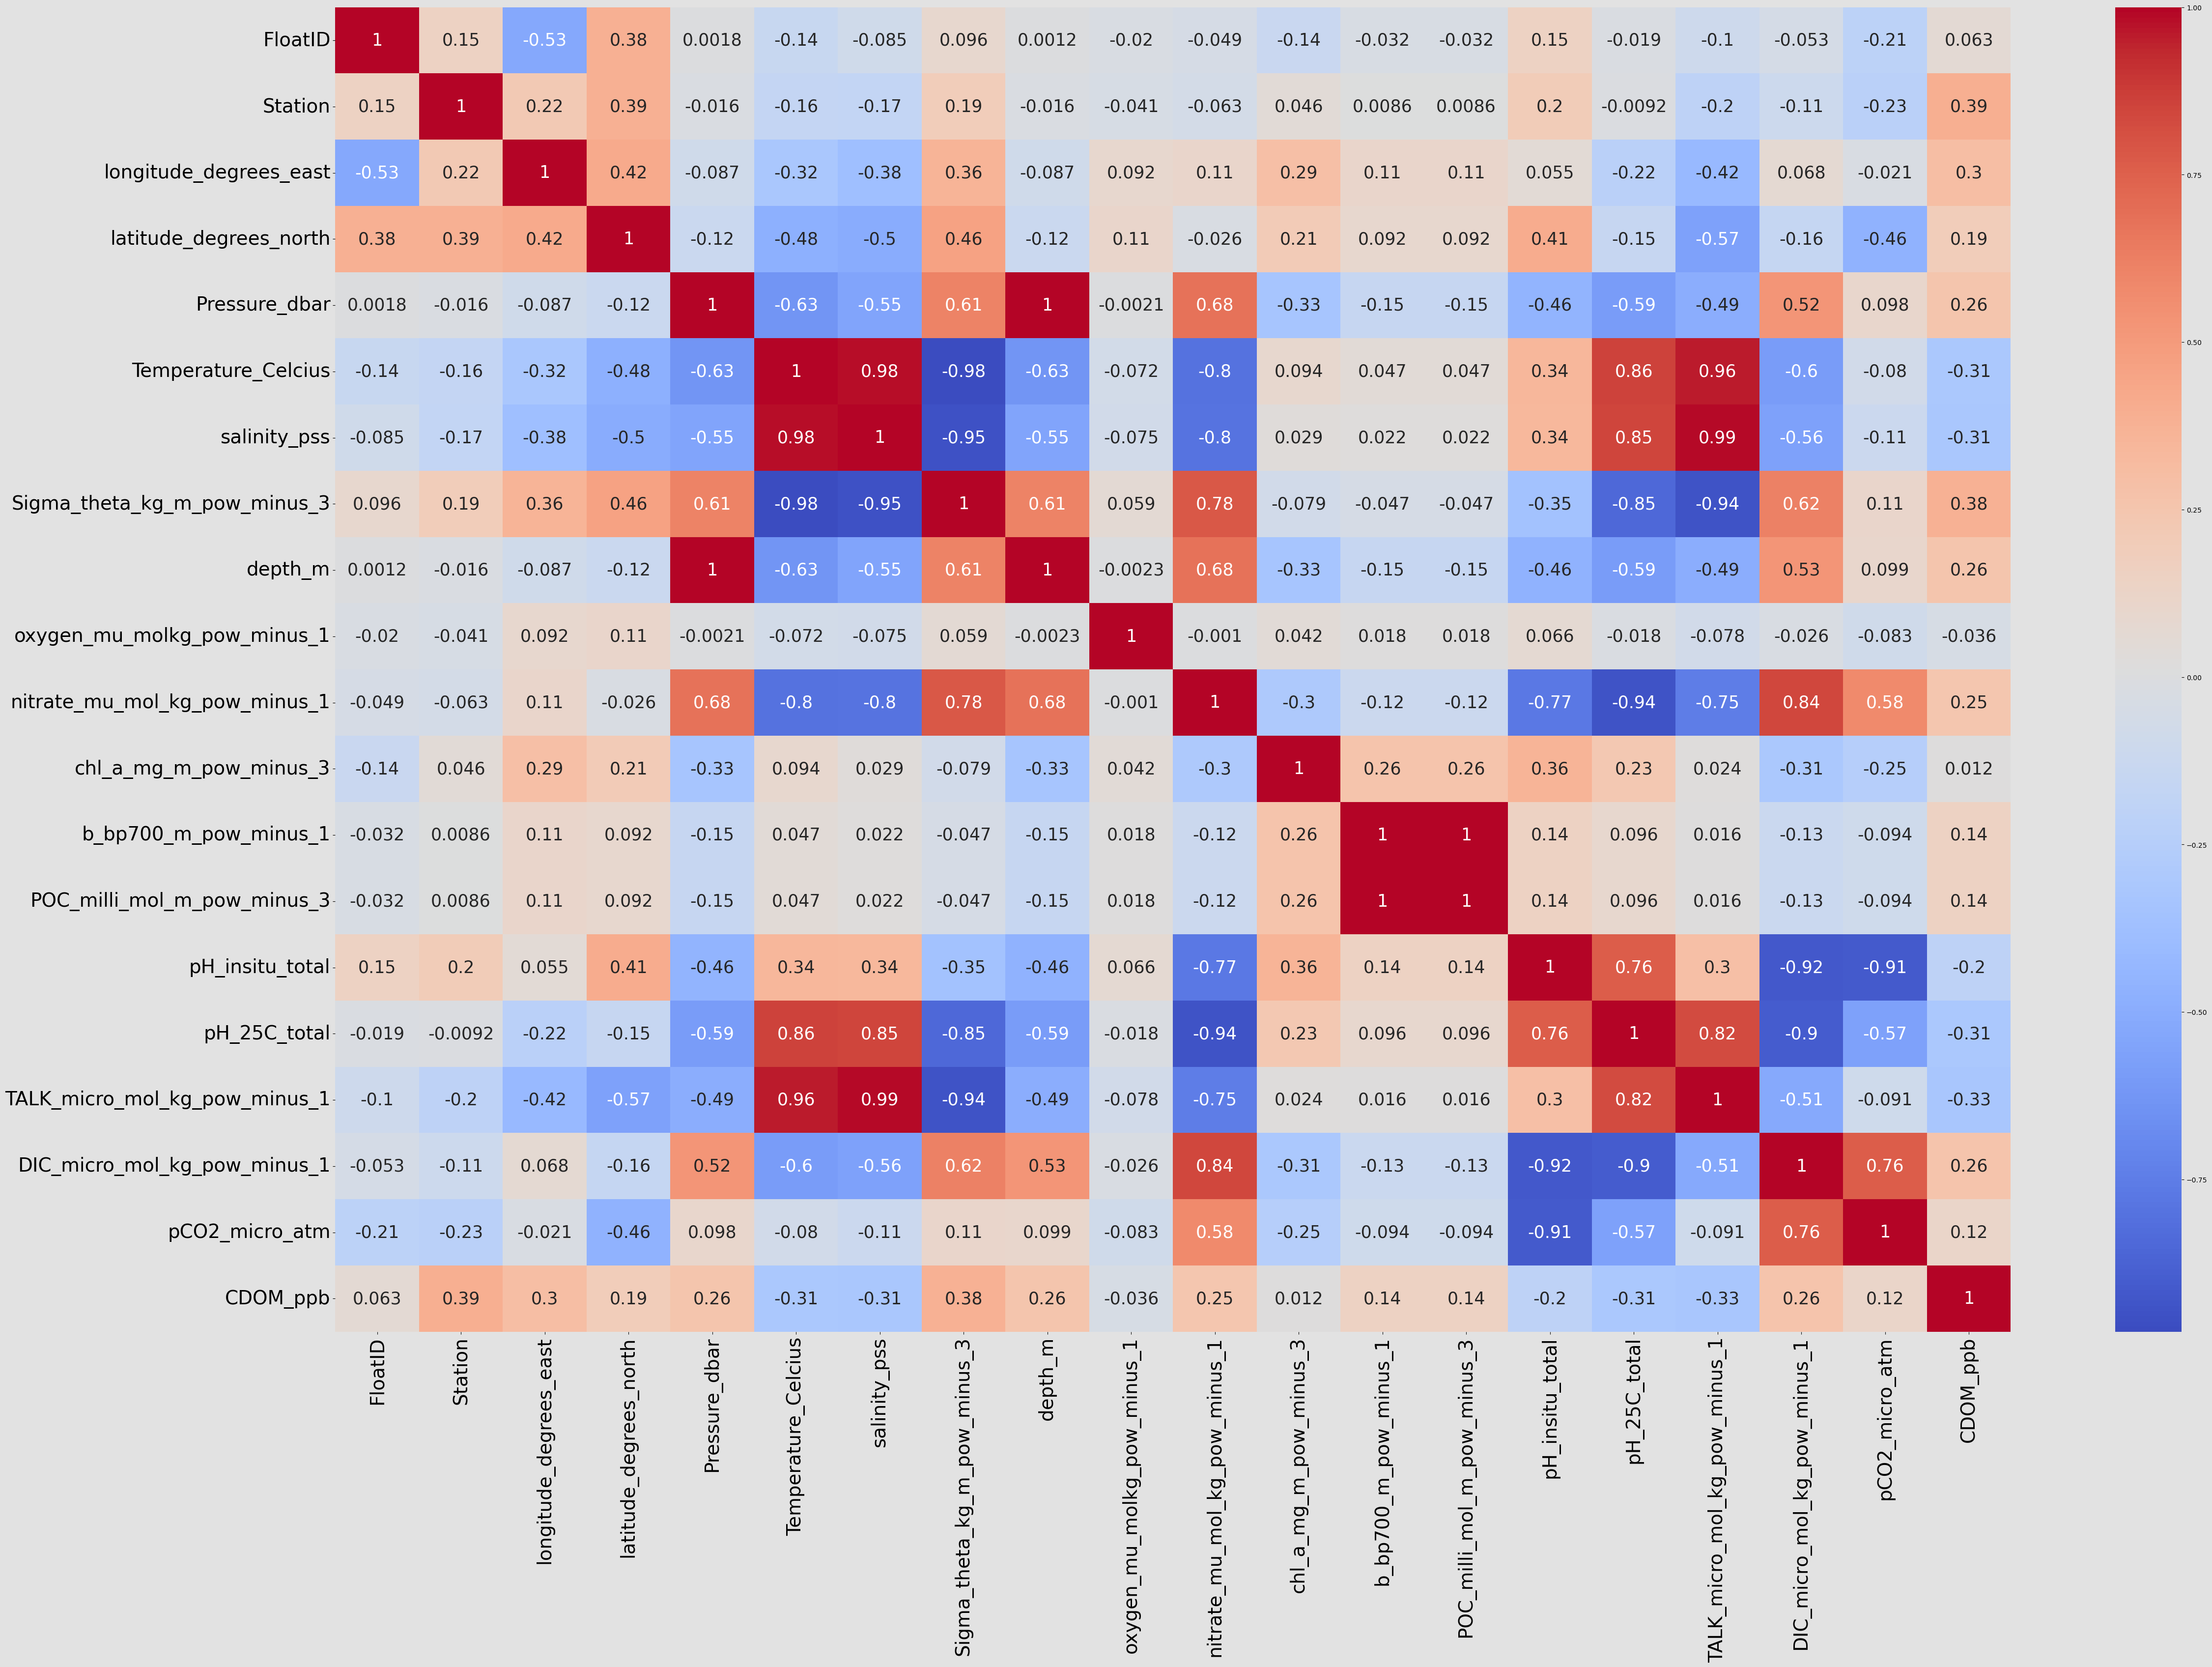

In [13]:
fig, ax = plt.subplots(figsize = (55, 35))
sns.heatmap(cor,annot=True,cmap='coolwarm',annot_kws={"size": 25})
plt.xticks(fontsize=28)
fig.set_facecolor('#E2E2E2')
plt.yticks(fontsize=28)
plt.show()

In [15]:
# sum of all the correlation co efficient for all columns
# low correlation coefficient has been considered, please take it into account in future

div=val.shape[1]-1
cor_list=[]
cor_col=cor.columns
for i in cor_col:
    sm=0
    for j in cor[i]:
        sm+=abs(j)
    #print("abs value for ",i," is ",sm)
    cor_list.append((i,(sm/div)*100))
cor_list.sort(key=lambda i:i[1], reverse= True)

for i in cor_list:
    print(i)

('pH_25C_total', 52.09728825611904)
('nitrate_mu_mol_kg_pow_minus_1', 50.735367864199546)
('Sigma_theta_kg_m_pow_minus_3', 50.17402386517139)
('Temperature_Celcius', 50.1271119992348)
('salinity_pss', 48.74706960048199)
('TALK_micro_mol_kg_pow_minus_1', 47.818979266293745)
('DIC_micro_mol_kg_pow_minus_1', 47.437384169892546)
('pH_insitu_total', 43.90757766936304)
('depth_m', 40.789291352013194)
('Pressure_dbar', 40.75759489133282)
('latitude_degrees_north', 33.309290312684844)
('pCO2_micro_atm', 31.360778367843988)
('CDOM_ppb', 27.654531634856873)
('longitude_degrees_east', 27.28553098597369)
('chl_a_mg_m_pow_minus_3', 24.161402225221185)
('POC_milli_mol_m_pow_minus_3', 19.330288508240177)
('b_bp700_m_pow_minus_1', 19.329660373755193)
('Station', 19.053397837277988)
('FloatID', 17.031974396664886)
('oxygen_mu_molkg_pow_minus_1', 9.779616642697068)


### LinearGram

In [15]:
## custom linear kernel
#sigma=1.9, 8.68,9.84

def Kernel(U,V,sigma):
    return sigma*np.sum(U)*np.sum(V)
def Lineargram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel(U[i],V[j],sigma)
    return G


def LinearRegressor(x_train1,y_train1,x_test1,y_test,sigma):
    Linear_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    Linear_regressor.fit(Lineargram(x_train1,x_train1,sigma),y_train1)
    y_pred=Linear_regressor.predict(Lineargram(x_test1,x_train1,sigma))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train1.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [20]:
## testing purpose

a=1.9
while(a<18):

    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.1,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)
    print(f'while a={a}')
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,a)
    print(f'for a={a}')
    if(val1[0]!=-1):
        print(f'mse: {val1[0]}, rmse: {val1[1]}, r-squared: {val1[2]}, adjusted r-squared: {val1[3]}')
    a+=0.01

while a=1.9
for a=1.9
mse: 0.017963880111948664, rmse: 0.13402940017753068, r-squared: 0.10310344179927877, adjusted r-squared: 0.09042410057471495
while a=1.91
for a=1.91
while a=1.92
for a=1.92
mse: 0.018002633594981568, rmse: 0.13417389312001635, r-squared: 0.05286806260492205, adjusted r-squared: 0.039478548609009456
while a=1.93
for a=1.93
while a=1.94
for a=1.94
mse: 0.01736988808510431, rmse: 0.1317948712397577, r-squared: 0.10493092803276705, adjusted r-squared: 0.0922774218070398
while a=1.95
for a=1.95
while a=1.96
for a=1.96
mse: 0.0178854224047602, rmse: 0.13373639147502148, r-squared: 0.08429654366990558, adjusted r-squared: 0.07135133111761993
while a=1.97
for a=1.97
mse: 0.01852777094914958, rmse: 0.13611675484358854, r-squared: 0.028723569723528963, adjusted r-squared: 0.014992727331227695
while a=1.98
for a=1.98
mse: 0.018618408353725878, rmse: 0.13644928857903907, r-squared: 0.031185696030229693, adjusted r-squared: 0.017489660483037905
while a=1.99
for a=1.99
mse: 0.

In [16]:
cnt=0
it=1
r2_list=[]
adj_r2_score_list=[]
mse_list=[]
rmse_list=[]

while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,2.067)
    if(val1[0]!=-1):
        mse_list.append(val1[0])
        rmse_list.append(val1[1])
        r2_list.append(val1[2])
        adj_r2_score_list.append(val1[3])
        print(f'adjusted r-squared: {val1[3]}')
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
2 -th iterations
3 -th iterations
4 -th iterations
5 -th iterations
6 -th iterations
adjusted r-squared: 0.010542645288000752
Total  1  number of records found yet!
7 -th iterations
8 -th iterations
9 -th iterations
10 -th iterations
11 -th iterations
12 -th iterations
13 -th iterations
14 -th iterations
15 -th iterations
16 -th iterations
17 -th iterations
18 -th iterations
19 -th iterations
20 -th iterations
adjusted r-squared: 0.03528149927741886
Total  2  number of records found yet!
21 -th iterations
22 -th iterations
23 -th iterations
24 -th iterations
25 -th iterations
26 -th iterations
27 -th iterations
28 -th iterations
29 -th iterations
30 -th iterations
31 -th iterations
32 -th iterations
33 -th iterations
34 -th iterations
35 -th iterations
36 -th iterations
37 -th iterations
38 -th iterations
39 -th iterations
40 -th iterations
41 -th iterations
42 -th iterations
43 -th iterations
44 -th iterations
45 -th iterations
46 -th iterations
47 -th iterations
48 -

In [17]:
print(sum(rmse_list)/len(rmse_list))
print(sum(adj_r2_score_list)/len(adj_r2_score_list))

0.12693512644279295
0.026693479718796643


### Linear Regression

In [100]:
# linear kernel based SVR called, and the model fitted to the training data
# pre-built function
# we may need it


train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.999,
                            train_size=0.001)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)





regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.001283244525969853
RMSE: 0.03582240257115445
r2 value:  0.9339539797369899
adjusted r2 value:  0.9338616959904833


### Polynomial Kernel
#### Parameters Tuning

In [22]:
# degree 2 is better, and by default is 3
# testing on poly kernel, degree parameter for ph25C
# use degree=4

for i in [2,3,4,5,6,7,8,9]:
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.2,
                                train_size=0.8)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)
    
    print("degree is: ",i)
    regressor=SVR(kernel='poly',degree=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

degree is:  2
RMSE: 0.034711442072566406
adjusted r2 value:  0.9363332734398971
degree is:  3
RMSE: 0.012864224572738418
adjusted r2 value:  0.991617136217889
degree is:  4
RMSE: 0.054696956877984856
adjusted r2 value:  0.8452906423863444
degree is:  5
RMSE: 0.16692299964090457
adjusted r2 value:  -0.426293669272531
degree is:  6
RMSE: 0.4918855209998855
adjusted r2 value:  -11.738374722469937
degree is:  7
RMSE: 9293.367768404
adjusted r2 value:  -4535469611.27021
degree is:  8
RMSE: 38.7945846643285
adjusted r2 value:  -80351.09843944601
degree is:  9


In [16]:
# lesser coef0 is better, and 0.4 is good!!!!
## testing on poly, coef parameter for ph25C
# coef0 is:  0.4

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.2,
                                train_size=0.5)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    
    print("coef0 is: ",i)
    regressor=SVR(kernel='poly',coef0=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

coef0 is:  0.1
RMSE: 0.027220739714995754
adjusted r2 value:  0.9616068688823668
coef0 is:  0.2
RMSE: 0.010133623407714154
adjusted r2 value:  0.9947911029861315
coef0 is:  0.3
RMSE: 0.0072306992810255155
adjusted r2 value:  0.9972773078676402
coef0 is:  0.4
RMSE: 0.09963601273387522
adjusted r2 value:  0.4981343680165772
coef0 is:  0.5
RMSE: 0.00721728073913848
adjusted r2 value:  0.9972843715241623
coef0 is:  0.6
RMSE: 0.006754589413502387
adjusted r2 value:  0.9976378756184612
coef0 is:  0.7
RMSE: 0.007742117404237246
adjusted r2 value:  0.9968562947815253
coef0 is:  0.8
RMSE: 0.008401059918570902
adjusted r2 value:  0.9963913573985201


#### Final Polynomial Kernel

In [21]:
## final params for poly kernel for ph25C
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='poly',degree=4,coef0=0.4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)


# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.007798826240940696
RMSE: 0.08831096331113536
r2 value:  0.5958437126298165
adjusted r2 value:  0.5930070042958551


### RBF kernel
#### Parameter Tuning

In [27]:
## better prediction for C=4
## it's on RBF, C params
# C=0.0005


for i in [0.001,0.0003,0.0005]:
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.2,
                                train_size=0.5)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    print("C is: ",i)
    regressor=SVR(C=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

C is:  0.001
RMSE: 0.06056578871063926
adjusted r2 value:  0.8113724923558495
C is:  0.0003
RMSE: 0.1088224670120319
adjusted r2 value:  0.3876906884834008
C is:  0.0005
RMSE: 0.0879856541932773
adjusted r2 value:  0.5955361291730903


In [30]:
## epsilon = 0.001 produces better result
# on RBF kernel, epsilon params
# use epsilon = 0.9


for i in [0.1,0.9,0.05,2]:
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.2,
                                train_size=0.5)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    print("epsilon is: ",i)
    regressor=SVR(epsilon=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

epsilon is:  0.1
RMSE: 0.009464547843626766
adjusted r2 value:  0.995287622742465
epsilon is:  0.9
RMSE: 0.07886240467641872
adjusted r2 value:  0.6702169291452211
epsilon is:  0.05
RMSE: 0.011345268767106101
adjusted r2 value:  0.9930778849222835
epsilon is:  2
RMSE: 0.13437801581569256
adjusted r2 value:  0.055957188261500646


#### Final RBF kernel

In [36]:
## final 
## default is RBF

train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)

regressor=SVR(epsilon=0.09, C=0.0005)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.00502253460898456
RMSE: 0.07086984273288999
r2 value:  0.7480390697863777
adjusted r2 value:  0.7462705963197878


### Gaussian Multiplication Kernel

In [23]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return -1

In [24]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T
cnt=0
it=1
r2_RBF_matmul_list=[]
adj_r2_RBF_matmul_score_list=[]
mse_RBF_matmul_list=[]
rmse_RBF_matmul_list=[]
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.07,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        mse_RBF_matmul_list.append(val1[0])
        rmse_RBF_matmul_list.append(val1[1])
        r2_RBF_matmul_list.append(val1[2])
        adj_r2_RBF_matmul_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
MSE: 0.000757711950485054
RMSE: 0.02752656808403572
r2 value:  0.9602001928021948
adjusted r2 value:  0.9593914266666245
Total  1  number of records found yet!
2 -th iterations
MSE: 0.0006567369775744493
RMSE: 0.02562687998127063
r2 value:  0.9648687598742174
adjusted r2 value:  0.9641548630160464
Total  2  number of records found yet!
3 -th iterations
MSE: 0.0008532365012597748
RMSE: 0.02921021227686945
r2 value:  0.9561445291958846
adjusted r2 value:  0.9552533485057475
Total  3  number of records found yet!
4 -th iterations
MSE: 0.0006520815430786251
RMSE: 0.025535887356397568
r2 value:  0.9656214931927164
adjusted r2 value:  0.9649228925196273
Total  4  number of records found yet!
5 -th iterations
MSE: 0.0008539974898984337
RMSE: 0.029223235445419687
r2 value:  0.9589651988069601
adjusted r2 value:  0.9581313365367272
Total  5  number of records found yet!
6 -th iterations
MSE: 0.0006807515946040299
RMSE: 0.0260912168095708
r2 value:  0.9649945142860157
adjusted r

In [25]:
print(sum(rmse_RBF_matmul_list)/len(rmse_RBF_matmul_list))
print(sum(adj_r2_RBF_matmul_score_list)/len(adj_r2_RBF_matmul_score_list))

0.026718541763232052
0.9620124179574379


### Sinh Kernel

In [15]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    # sigma=float(input("paramter for sigma: "))
    # C=float(input("paramter for C: "))
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    # print("y_test: ",y_test,"y_pred",y_pred)
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return -1

In [ ]:
cnt=0
it=1
r2_custom_sinh_list=[]
adj_r2_custom_sinh_score_list=[]
mse_custom_sinh_list=[]
rmse_custom_sinh_list=[]
sigma=float(input("paramter for sigma: "))
C=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,C)
    if(val1[0]!=-1):
        mse_custom_sinh_list.append(val1[0])
        rmse_custom_sinh_list.append(val1[1])
        r2_custom_sinh_list.append(val1[2])
        adj_r2_custom_sinh_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

In [22]:
print(sum(rmse_custom_sinh_list)/len(rmse_custom_sinh_list))
print(sum(adj_r2_custom_sinh_score_list)/len(adj_r2_custom_sinh_score_list))

0.01177363645948872
0.9907408003981057


### Visualisation

#### Visualiation function

In [35]:
def visual(x,y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    plt.colorbar()
    plt.title('SVR with 16 Features')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()

##### Sinh Kernel

In [27]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    # sigma=float(input("paramter for sigma: "))
    # C=float(input("paramter for C: "))
    
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    print("for the training dataset")
    visual(x_train1,y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    return y_pred


for the training dataset


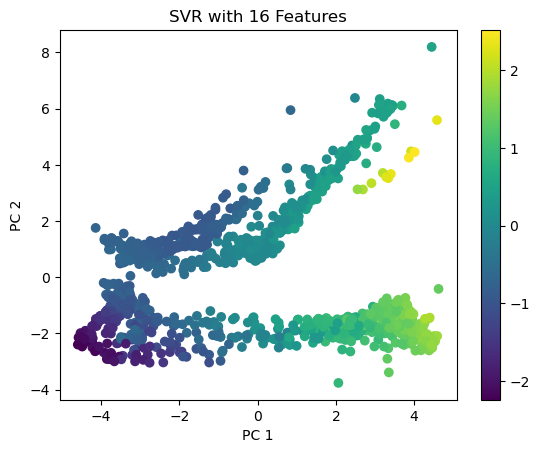

for the testing dataset


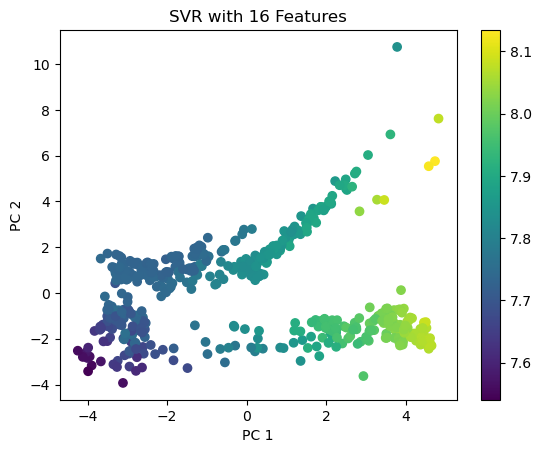

In [29]:
## for visualisation


train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.04,
                            train_size=0.1)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_pred=sinh(x_train1,y_train1,x_test1,y_test,0.001,0)
print("for the testing dataset")
visual(x_test1,y_pred)

##### Gaussian Matmul Kernel

In [ ]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return -1

In [ ]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T

sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))


train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.07,
                            train_size=0.4)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)

val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
if(val1[0]!=-1):
    mse_RBF_matmul_list.append(val1[0])
    rmse_RBF_matmul_list.append(val1[1])
    r2_RBF_matmul_list.append(val1[2])
    adj_r2_RBF_matmul_score_list.append(val1[3])

##### Linear Kernel

for training dataset
(10904, 19)
(10904, 2)


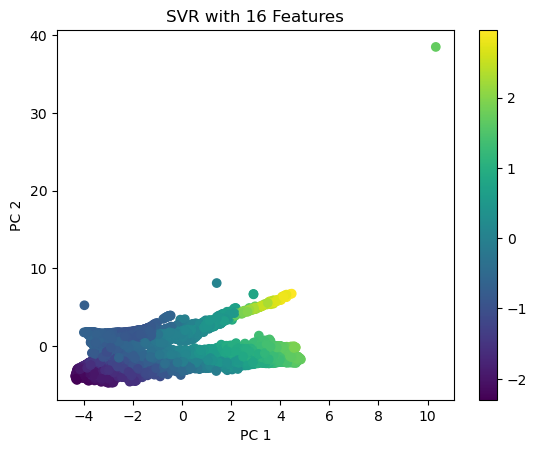

for testing dataset
(2727, 19)
(2727, 2)


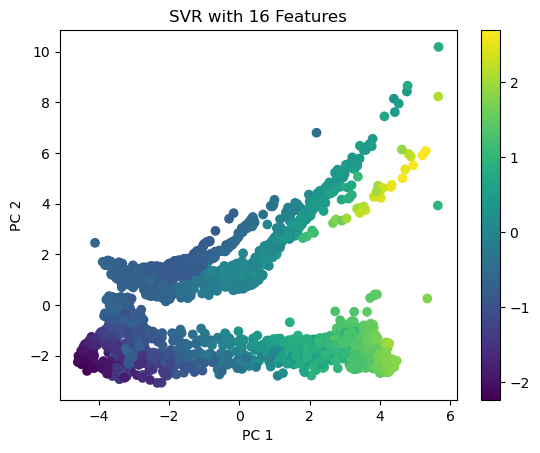

In [34]:
# linear kernel based SVR called, and the model fitted to the training data
# pre-built function
# we may need it


train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)





regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
sv=regressor.support_

print("for training dataset")
visual(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
print("for testing dataset")
visual(x_test1,y_pred)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

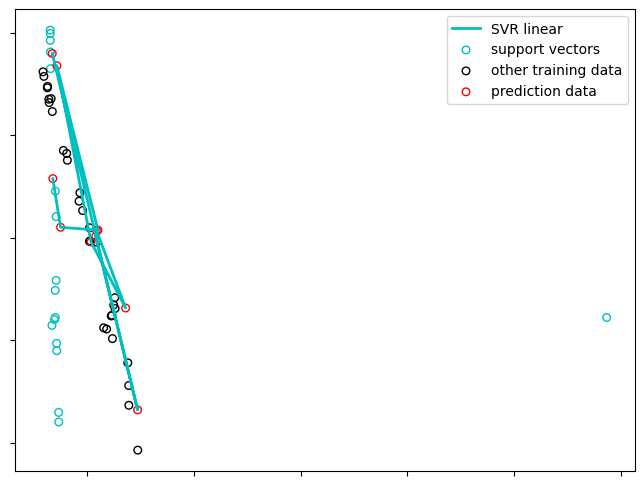

In [17]:
# sv_index_x
# sv_index_y
# y_pred
# x_pred




train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]


## support vector data
pca = PCA(n_components=1)
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]



# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
ind=np.random.randint(0,x_test1.shape[0],size=10)
pred_x=x_test1[ind]
pred_x=pca.fit_transform(pred_x)
pred_y=y_pred[ind]




## training data
ind=np.random.randint(0,x_train1.shape[0],size=30)
train_x=x_train1[ind]
train_x=pca.fit_transform(train_x)
train_y=y_train1[ind]



plt.figure(figsize=(8, 6))

plt.plot(
    pred_x,
    pred_y,
    color="c",
    lw=2,
    label="SVR linear",)
plt.scatter(
    sv_index_x,
    sv_index_y,
    facecolor="none",
    edgecolor="c",
    s=30,
    label="support vectors",)
plt.scatter(
    train_x,
    train_y,
    facecolor="none",
    edgecolor="k",
    s=30,
    label="other training data",)
plt.scatter(
    pred_x,
    pred_y,
    facecolor="none",
    edgecolor="r",
    s=30,
    label="prediction data",)
# plt.legend(
#     loc="upper center",
#     bbox_to_anchor=(0.5, 1.1),
#     ncol=1,""
#     fancybox=True,
#     shadow=True,)

plt.tick_params(axis='both', which='both', labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.legend()
plt.show()

75


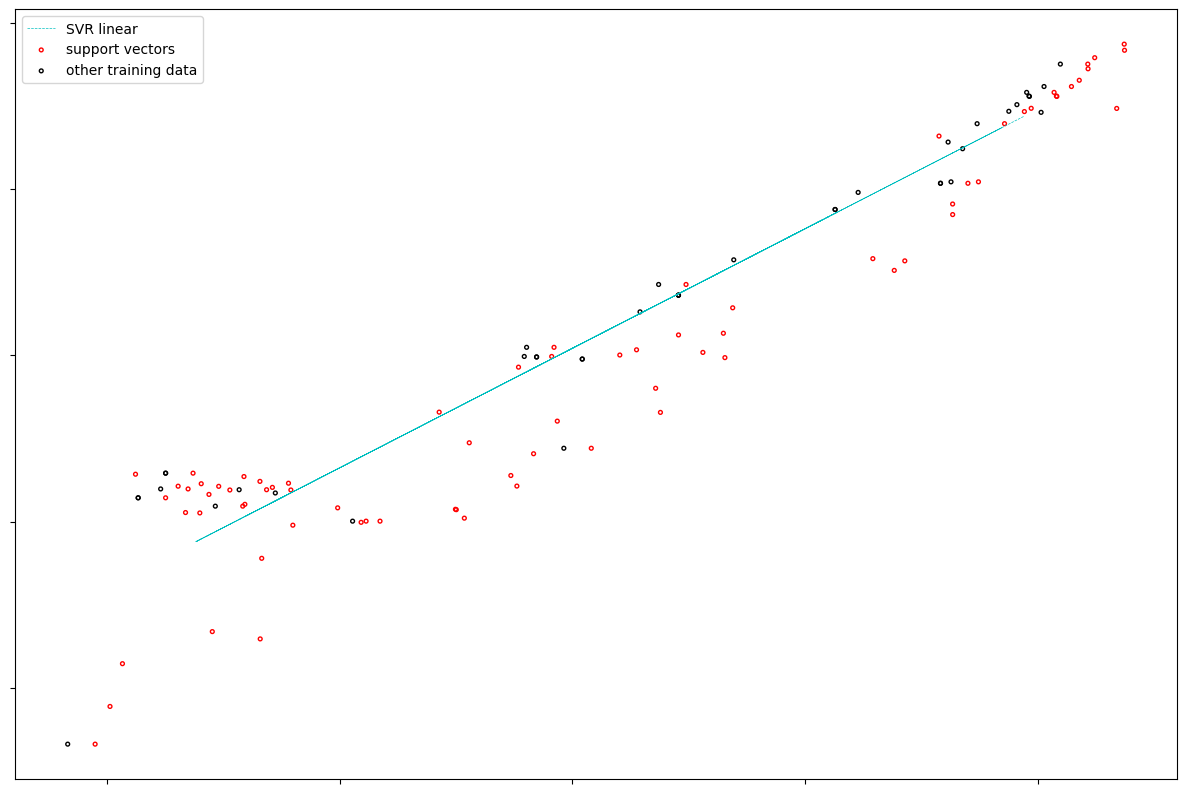

In [51]:
pca = PCA(n_components=1)
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.003,
                            train_size=0.008)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]



# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
ind=np.random.randint(0,x_test1.shape[0],size=20)
pred_x=x_test1[ind]
pred_y=y_pred[ind]




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]



plt.figure(figsize=(15, 10))

plt.plot(
    pred_x,
    pred_y,
    "c--",
    lw=0.5,
    label="SVR linear",)
plt.scatter(
    sv_index_x,
    sv_index_y,
    facecolor="none",
    edgecolor="red",
    s=30,
    marker='.',
    label="support vectors",)
plt.scatter(
    train_x,
    train_y,
    facecolor="none",
    edgecolor="k",
    s=30,
    marker='.',
    label="other training data",)
# plt.scatter(
#     pred_x,
#     pred_y,
#     facecolor="none",
#     edgecolor="green",
#     s=30,
#     marker='.',
#     label="prediction data",)
# plt.legend(
#     loc="upper center",
#     bbox_to_anchor=(0.5, 1.1),
#     ncol=1,""
#     fancybox=True,
#     shadow=True,)

plt.tick_params(axis='both', which='both', labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.legend()
plt.show()

##### Polynomial Kernel

In [55]:
pca = PCA(n_components=1)
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.003,
                            train_size=0.008)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='poly',degree=4,coef0=0.4)
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]



# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
ind=np.random.randint(0,x_test1.shape[0],size=10)
x_test1=x_test1[ind].flatten()
y_pred=y_pred[ind].flatten()
# pred=[]
# for i in range(x_test1[ind].shape[0]):
#     pred.append((x_test1[ind][i][0],y_pred[ind][i]))
# print(pred)
pred=[]
for i in range(len(x_test1)):
    pred.append(tuple([x_test1[i],y_pred[i]]))

pred=sorted(pred)



## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]



plt.figure(figsize=(15, 10))

plt.plot(
    pred_x,
    pred_y,
    "c--",
    lw=0.5,
    label="SVR linear",)
plt.scatter(
    sv_index_x,
    sv_index_y,
    facecolor="none",
    edgecolor="red",
    s=30,
    marker='.',
    label="support vectors",)
plt.scatter(
    train_x,
    train_y,
    facecolor="none",
    edgecolor="k",
    s=30,
    marker='.',
    label="other training data",)
# plt.scatter(
#     pred_x,
#     pred_y,
#     facecolor="none",
#     edgecolor="green",
#     s=30,
#     marker='.',
#     label="prediction data",)
# plt.legend(
#     loc="upper center",
#     bbox_to_anchor=(0.5, 1.1),
#     ncol=1,""
#     fancybox=True,
#     shadow=True,)

plt.tick_params(axis='both', which='both', labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.legend()
plt.show()

[(5.641895343262837, 1.8328804289484546), (-0.2826966416019951, -0.12438619865529654), (1.8450227086900173, 0.6260887433908366), (3.1756734914711484, 1.169940384406605), (-2.5934681721214283, -0.7533353036393969), (-3.3375099726417807, -0.990873011603831), (4.115863082847484, 1.519694775131504), (-3.6848853175495035, -1.123427545986449), (3.1756734914711484, 1.169940384406605), (3.097998551168184, 1.1386879594793522)]
[(-3.6848853175495035, -1.123427545986449), (-3.3375099726417807, -0.990873011603831), (-2.5934681721214283, -0.7533353036393969), (-0.2826966416019951, -0.12438619865529654), (1.8450227086900173, 0.6260887433908366), (3.097998551168184, 1.1386879594793522), (3.1756734914711484, 1.169940384406605), (3.1756734914711484, 1.169940384406605), (4.115863082847484, 1.519694775131504), (5.641895343262837, 1.8328804289484546)]


##### Linear Kernel

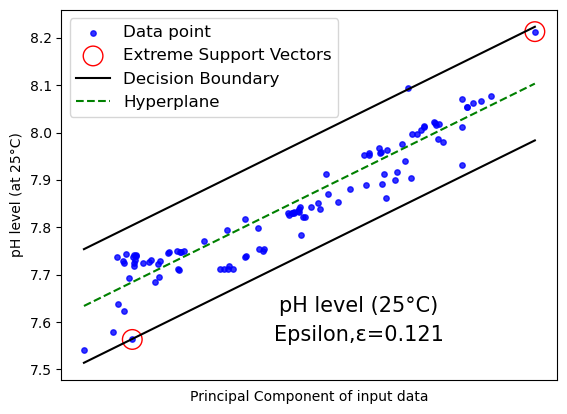

In [102]:
epsilon=0.12
pca = PCA(n_components=1)
train,test = train_test_split(val,
                            random_state=100,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])

positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
ax.set_ylabel("pH level (at 25°C)")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.6, 0.2, 'pH level (25°C)', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.6, 0.12, 'Epsilon,ε=0.121', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

9527


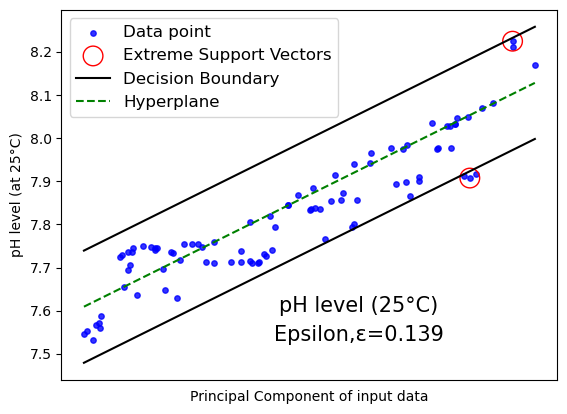

In [103]:
epsilon=0.13
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=8370,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])

positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
ax.set_ylabel("pH level (at 25°C)")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.6, 0.2, 'pH level (25°C)', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.6, 0.12, 'Epsilon,ε=0.139', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

##### Polynomial Kernel

(75, 19)


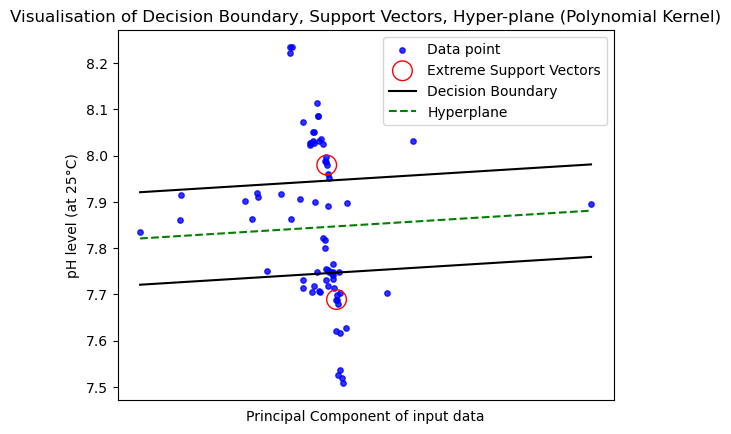

In [82]:
epsilon=0.1
pca = PCA(n_components=1)
train,test = train_test_split(val,
                            random_state=68,
                            test_size=0.005,
                            train_size=0.1)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train=sc_x.fit_transform(x_train)
y_train=sc_y.fit_transform(y_train)
x_test=sc_x.fit_transform(x_test)
y_test=sc_y.fit_transform(y_test)



regressor=SVR(kernel='poly',degree=4,coef0=0.4)
y_train=y_train.ravel()
# x_train1=pca.fit_transform(x_train1)
# x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train,y_train)
sv_index=regressor.support_
x=x_train[sv_index]


## support vector data
sv_x = x
sv_y=y_train[sv_index]
sv_y=sc_y.inverse_transform(sv_y.reshape(-1,1))


## modified here
x_test1=sv_x
y_test1=sv_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
pred_y=y_pred


## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]




x_test1=pca.fit_transform(x_test1)





# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])

positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
plt.title("Visualisation of Decision Boundary, Support Vectors, Hyper-plane (Polynomial Kernel)")
ax.set_ylabel("pH level (at 25°C)")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")

plt.legend()
plt.show()

##### RBF Kernel

2218
(266, 19)


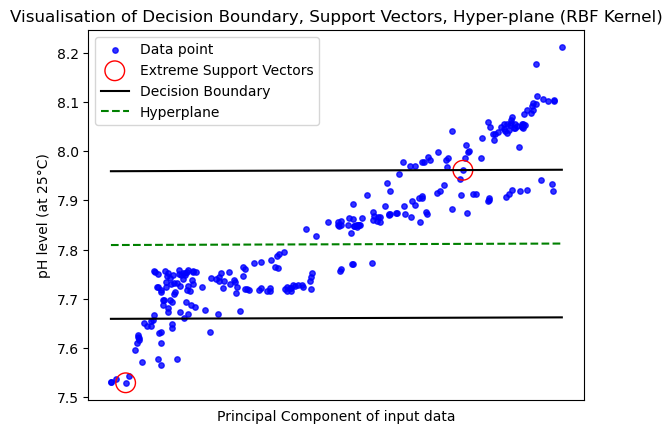

In [104]:
epsilon=0.15
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=a,
                            test_size=0.005,
                            train_size=0.02)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train=sc_x.fit_transform(x_train)
y_train=sc_y.fit_transform(y_train)
x_test=sc_x.fit_transform(x_test)
y_test=sc_y.fit_transform(y_test)


regressor=SVR(epsilon=0.09, C=0.0005)
y_train=y_train.ravel()
regressor.fit(x_train,y_train)
sv_index=regressor.support_
x=x_train[sv_index]


## support vector data
sv_x = x
sv_y=y_train[sv_index]
sv_y=sc_y.inverse_transform(sv_y.reshape(-1,1))


## modified here
x_test1=sv_x
y_test1=sv_y


# prediction function and prediction data
print(x_test1.shape)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
pred_y=y_pred


## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]




x_test1=pca.fit_transform(x_test1)




# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])

positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
plt.title("Visualisation of Decision Boundary, Support Vectors, Hyper-plane (RBF Kernel)")
ax.set_ylabel("pH level (at 25°C)")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")

plt.legend()
plt.show()


In [82]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    sv=RBF_matmul_regressor.support_
    sv_x=x_train1[sv]
    y_pred=RBF_matmul_regressor.predict(RBF_gram(sv_x,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    # r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    # n=y_test.shape[0]
    # k=x_train.shape[1]
    # adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    return sv,y_pred

2992


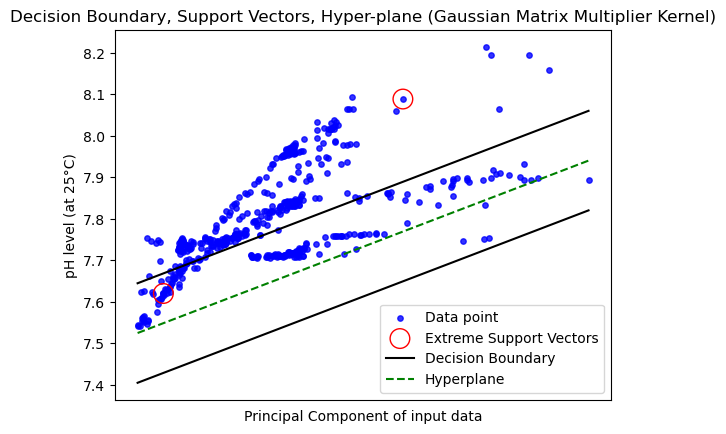

In [83]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T
pca = PCA(n_components=1)
# sigma=float(input("paramter for sigma: "))
# c=float(input("paramter for C: "))

epsilon=0.12
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=a,
                            test_size=0.04,
                            train_size=0.08)
    
# predicting ph

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train=sc_x.fit_transform(x_train)
y_train=sc_y.fit_transform(y_train)
x_test=sc_x.fit_transform(x_test)

sv_index,pred_y=RBF_matmul(x_train,y_train,x_test,y_test,5,2,mat)
pred_y=sc_y.inverse_transform(pred_y)



x_test1=x_train[sv_index]
y_test1=sc_y.inverse_transform(y_train[sv_index])
ind=np.random.randint(0,x_train[sv_index].shape[0],size=30)
pred_x=x_test1[ind]

x_test1=pca.fit_transform(x_test1)


positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])


positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
plt.title("Decision Boundary, Support Vectors, Hyper-plane (Gaussian Matrix Multiplier Kernel)")
ax.set_ylabel("pH level (at 25°C)")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")


# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')


# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")

plt.legend()
plt.show()
    

In [ ]:
#9574

In [16]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return y_pred
    else:
        return -1

In [17]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T

sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        y_pred_matmul=val1
        y_test_matmul=y_test
        break




In [18]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()    
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    return y_pred

In [19]:
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,c)
    if(val1[0]!=-1):
        y_pred_sine=val1
        y_test_sine=y_test
        break


#### Final Visualisation

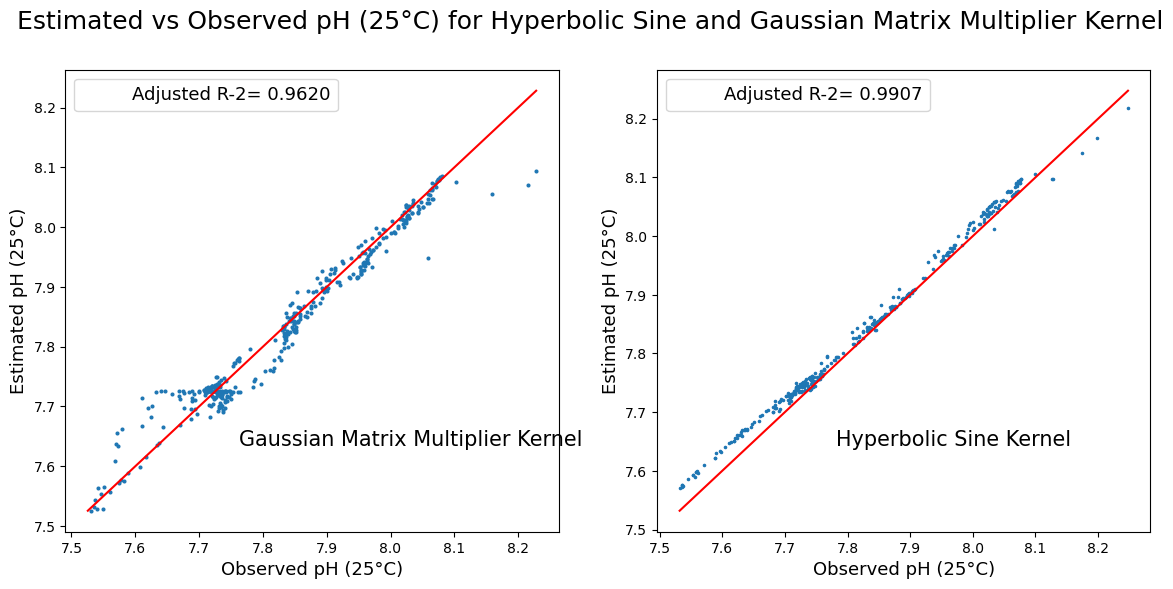

In [35]:
# create a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot the data and add text to each subplot
for i, ax in enumerate(axs):
    if i == 0:
        ax.scatter(list(y_test_matmul['pH_25C_total']),y_pred_matmul,s=15,marker='.')
        ax.plot([min(min(y_test_matmul['pH_25C_total']),float(min(y_pred_matmul))),max(max(y_test_matmul['pH_25C_total']),float(max(y_pred_matmul)))],
                [min(min(y_test_matmul['pH_25C_total']),float(min(y_pred_matmul))),max(max(y_test_matmul['pH_25C_total']),float(max(y_pred_matmul)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.9620",alpha=0)
        
        ax.set_xlabel("Observed pH (25°C)",fontsize=13)
        ax.set_ylabel("Estimated pH (25°C)",fontsize=13)
        ax.text(0.7, 0.2, 'Gaussian Matrix Multiplier Kernel', ha='center', va='center',fontsize=15, transform=ax.transAxes)


    elif i == 1:
        ax.scatter(list(y_test_sine['pH_25C_total']),y_pred_sine,s=10,marker='.')
        ax.plot([min(min(y_test_sine['pH_25C_total']),float(min(y_pred_sine))),max(max(y_test_sine['pH_25C_total']),float(max(y_pred_sine)))],
                [min(min(y_test_sine['pH_25C_total']),float(min(y_pred_sine))),max(max(y_test['pH_25C_total']),float(max(y_pred_sine)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.9907",alpha=0)
        ax.set_xlabel("Observed pH (25°C)",fontsize=13)
        ax.set_ylabel("Estimated pH (25°C)",fontsize=13)
        ax.text(0.6, 0.2, 'Hyperbolic Sine Kernel', ha='center', va='center',fontsize=15, transform=ax.transAxes)

    ax.legend(fontsize=13)
plt.suptitle("Estimated vs Observed pH (25°C) for Hyperbolic Sine and Gaussian Matrix Multiplier Kernel",fontsize=18)
plt.show()


In [36]:
import numpy as np
import matplotlib.pyplot as plt


# Generate 1000 random numbers from a normal distribution
# with a mean of 'mu' and a standard deviation of 'sigma'
normal_sine_ph = np.random.normal(0.9907, 0.1, 80)
normal_matmul_ph=np.random.normal(0.9620, 0.11, 80)
normal_sine_nitrate=np.random.normal(0.9733,0.7,80)
normal_matmul_nitrate=np.random.normal(0.8713,0.9,80)
normal_sine_sigma=np.random.normal(0.9537,0.14,80)
normal_matmul_sigma=np.random.normal(0.8865,0.8,80)

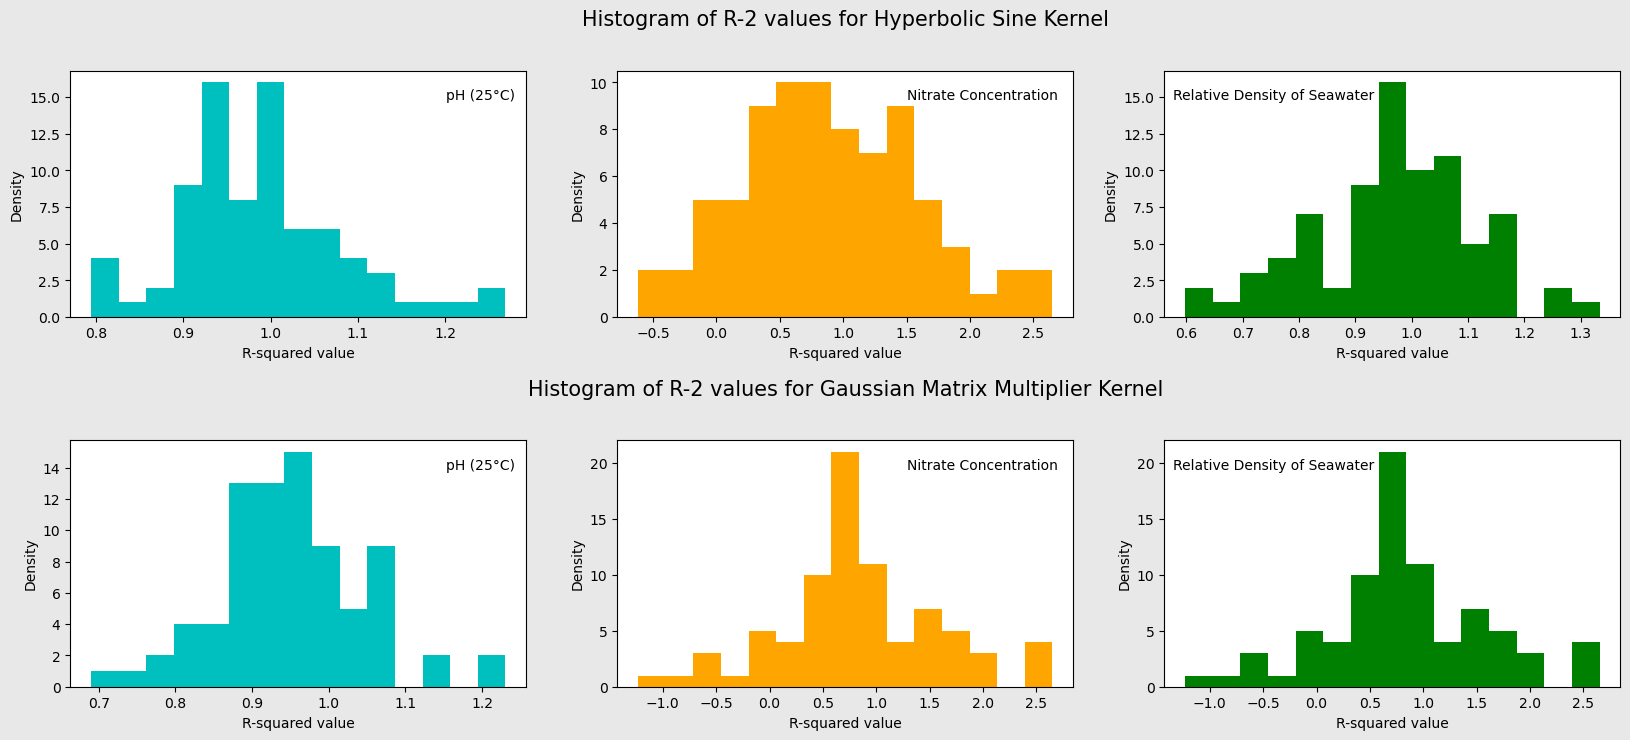

In [84]:
# create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

# plot the data and add text to each subplot
axs[0,0].hist(normal_sine_ph, bins=15,color='c')
axs[0,0].set_xlabel("R-squared value")
axs[0,0].set_ylabel("Density")
axs[0,0].text(0.9, 0.9, 'pH (25°C)', ha='center', va='center', transform=axs[0,0].transAxes)



axs[0,1].hist(normal_sine_nitrate, bins=15,color='orange')
axs[0,1].set_title("Histogram of R-2 values for Hyperbolic Sine Kernel",y=1.15,fontsize=15)
axs[0,1].set_xlabel("R-squared value")
axs[0,1].set_ylabel("Density")
axs[0,1].text(0.8, 0.9, 'Nitrate Concentration', ha='center', va='center', transform=axs[0,1].transAxes)



axs[0,2].hist(normal_sine_sigma, bins=15,color='green')
axs[0,2].set_xlabel("R-squared value")
axs[0,2].set_ylabel("Density")
axs[0,2].text(0.24, 0.9, 'Relative Density of Seawater', ha='center', va='center', transform=axs[0,2].transAxes)





axs[1,0].hist(normal_matmul_ph, bins=15,color='c')
axs[1,0].set_xlabel("R-squared value")
axs[1,0].set_ylabel("Density")
axs[1,0].text(0.9, 0.9, 'pH (25°C)', ha='center', va='center', transform=axs[1,0].transAxes)


axs[1,1].hist(normal_matmul_sigma, bins=15,color='orange')
axs[1,1].set_xlabel("R-squared value")
axs[1,1].set_ylabel("Density")
axs[1,1].set_title("Histogram of R-2 values for Gaussian Matrix Multiplier Kernel",y=1.15,fontsize=15)
axs[1,1].text(0.8, 0.9, 'Nitrate Concentration', ha='center', va='center', transform=axs[1,1].transAxes)



axs[1,2].hist(normal_matmul_sigma, bins=15,color='green')
axs[1,2].set_xlabel("R-squared value")
axs[1,2].set_ylabel("Density")
axs[1,2].text(0.24, 0.9, 'Relative Density of Seawater', ha='center', va='center', transform=axs[1,2].transAxes)



plt.subplots_adjust(hspace=0.5)
fig.set_facecolor('#E8E8E8')
# plt.suptitle("Histogram of R-2 values for Hyperbolic Sine and Gaussian Matrix Multiplier Kernel",x=0.5,y=1.05,fontsize=20)
plt.show()


In [42]:
y_test_matmul['predict']=y_pred_matmul
matmul_ph=y_test_matmul
y_test_sine['predict']=y_pred_sine
sine_ph=y_test_sine
matmul_nitrate=pd.read_csv('matmul_nitrate.csv')
sine_nitrate=pd.read_csv('sine_nitrate.csv')
matmul_sigma=pd.read_csv('matmul_sigma.csv')
sine_sigma=pd.read_csv('sine_sigma.csv')

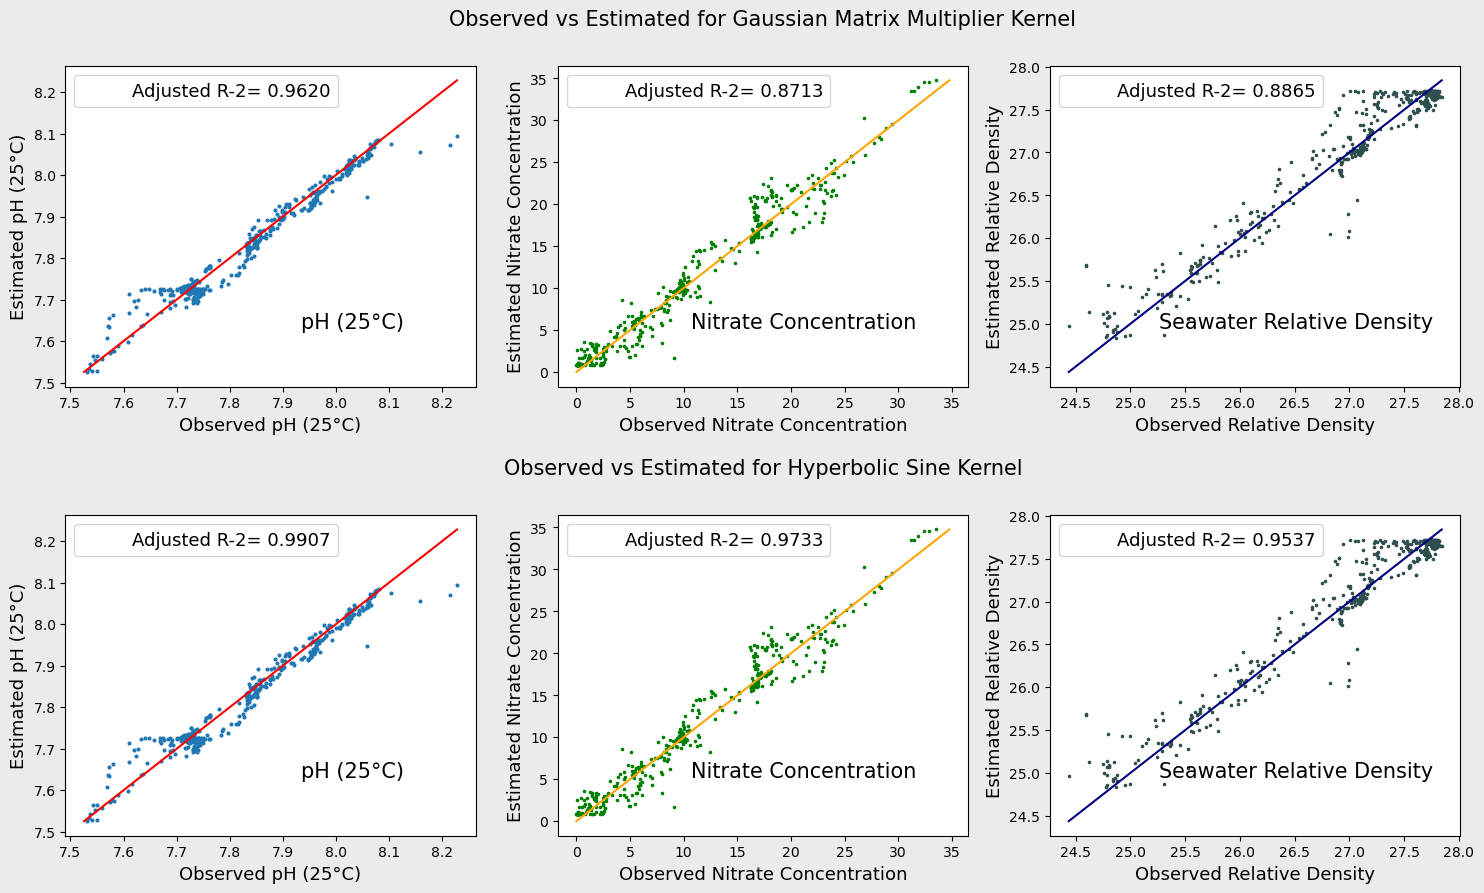

In [93]:
# create a grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# plot the data and add text to each subplot


ax[0,0].scatter(list(matmul_ph['pH_25C_total']),matmul_ph['predict'],s=15,marker='.')
ax[0,0].plot([min(min(matmul_ph['pH_25C_total']),float(min(matmul_ph['predict']))),max(max(matmul_ph['pH_25C_total']),float(max(matmul_ph['predict'])))],
        [min(min(matmul_ph['pH_25C_total']),float(min(matmul_ph['predict']))),max(max(matmul_ph['pH_25C_total']),float(max(matmul_ph['predict'])))],
        color='r')
ax[0,0].scatter([],[],label="Adjusted R-2= 0.9620",alpha=0)

ax[0,0].set_xlabel("Observed pH (25°C)",fontsize=13)
ax[0,0].set_ylabel("Estimated pH (25°C)",fontsize=13)
ax[0,0].text(0.7, 0.2, 'pH (25°C)', ha='center', va='center',fontsize=15, transform=ax[0,0].transAxes)
ax[0,0].legend(fontsize=13)



ax[0,1].set_title("Observed vs Estimated for Gaussian Matrix Multiplier Kernel",y=1.1,fontsize=15)
ax[0,1].scatter(list(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),matmul_nitrate['predict'],s=10,marker='.',color='green')
ax[0,1].plot([min(min(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(min(matmul_nitrate['predict']))),max(max(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(max(matmul_nitrate['predict'])))],
        [min(min(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(min(matmul_nitrate['predict']))),max(max(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(max(matmul_nitrate['predict'])))],
        color='orange')
ax[0,1].scatter([],[],label="Adjusted R-2= 0.8713",alpha=0)
ax[0,1].set_xlabel("Observed Nitrate Concentration",fontsize=13)
ax[0,1].set_ylabel("Estimated Nitrate Concentration",fontsize=13)
ax[0,1].text(0.6, 0.2, 'Nitrate Concentration', ha='center', va='center',fontsize=15, transform=ax[0,1].transAxes)
ax[0,1].legend(fontsize=13)




ax[0,2].scatter(list(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),matmul_sigma['predict'],s=10,marker='.',color="#2F4F4F")
ax[0,2].plot([min(min(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(min(matmul_sigma['predict']))),max(max(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(max(matmul_sigma['predict'])))],
        [min(min(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(min(matmul_sigma['predict']))),max(max(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(max(matmul_sigma['predict'])))],
        color='#000080')
ax[0,2].scatter([],[],label="Adjusted R-2= 0.8865",alpha=0)
ax[0,2].set_xlabel("Observed Relative Density",fontsize=13)
ax[0,2].set_ylabel("Estimated Relative Density",fontsize=13)
ax[0,2].text(0.6, 0.2, 'Seawater Relative Density', ha='center', va='center',fontsize=15, transform=ax[0,2].transAxes)
ax[0,2].legend(fontsize=13)






ax[1,0].scatter(list(matmul_ph['pH_25C_total']),matmul_ph['predict'],s=15,marker='.')
ax[1,0].plot([min(min(matmul_ph['pH_25C_total']),float(min(matmul_ph['predict']))),max(max(matmul_ph['pH_25C_total']),float(max(matmul_ph['predict'])))],
        [min(min(matmul_ph['pH_25C_total']),float(min(matmul_ph['predict']))),max(max(matmul_ph['pH_25C_total']),float(max(matmul_ph['predict'])))],
        color='r')
ax[1,0].scatter([],[],label="Adjusted R-2= 0.9907",alpha=0)

ax[1,0].set_xlabel("Observed pH (25°C)",fontsize=13)
ax[1,0].set_ylabel("Estimated pH (25°C)",fontsize=13)
ax[1,0].text(0.7, 0.2, 'pH (25°C)', ha='center', va='center',fontsize=15, transform=ax[1,0].transAxes)
ax[1,0].legend(fontsize=13)




ax[1,1].set_title("Observed vs Estimated for Hyperbolic Sine Kernel",y=1.1,fontsize=15)
ax[1,1].scatter(list(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),matmul_nitrate['predict'],s=10,marker='.',color="green")
ax[1,1].plot([min(min(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(min(matmul_nitrate['predict']))),max(max(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(max(matmul_nitrate['predict'])))],
        [min(min(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(min(matmul_nitrate['predict']))),max(max(matmul_nitrate['nitrate_mu_mol_kg_pow_minus_1']),float(max(matmul_nitrate['predict'])))],
        color='orange')
ax[1,1].scatter([],[],label="Adjusted R-2= 0.9733",alpha=0)
ax[1,1].set_xlabel("Observed Nitrate Concentration",fontsize=13)
ax[1,1].set_ylabel("Estimated Nitrate Concentration",fontsize=13)
ax[1,1].text(0.6, 0.2, 'Nitrate Concentration', ha='center', va='center',fontsize=15, transform=ax[1,1].transAxes)
ax[1,1].legend(fontsize=13)



ax[1,2].scatter(list(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),matmul_sigma['predict'],s=10,marker='.',color="#2F4F4F")
ax[1,2].plot([min(min(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(min(matmul_sigma['predict']))),max(max(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(max(matmul_sigma['predict'])))],
        [min(min(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(min(matmul_sigma['predict']))),max(max(matmul_sigma['Sigma_theta_kg_m_pow_minus_3']),float(max(matmul_sigma['predict'])))],
        color='#000080')
ax[1,2].scatter([],[],label="Adjusted R-2= 0.9537",alpha=0)
ax[1,2].set_xlabel("Observed Relative Density",fontsize=13)
ax[1,2].set_ylabel("Estimated Relative Density",fontsize=13)
ax[1,2].text(0.6, 0.2, 'Seawater Relative Density', ha='center', va='center',fontsize=15, transform=ax[1,2].transAxes)
ax[1,2].legend(fontsize=13)


plt.subplots_adjust(hspace=0.4)
fig.set_facecolor('#EBEBEB')
plt.show()
